# Chi-square Goodness-of-Fit Test Example

## Brief Description
The Chi-square goodness-of-fit test is a statistical hypothesis test used to determine whether a sample of data comes from a population with a specific distribution. It compares observed frequencies with expected frequencies for categorical data to assess how well the observed distribution fits the expected distribution.

Mathematically, the chi-square statistic is defined as:

χ^2 = Σ [(Oi - Ei)^2/Ei]

Where:
- χ^2 is the chi-square test statistic
- Oi is the observed frequency for category i
- Ei is the expected frequency for category i under the hypothesized distribution
- The sum is taken over all categories

## Visual Illustration

![Chi-square Goodness-of-Fit Test](Figures/chi2gof_example.png)

*Figure 1: The chi-square goodness-of-fit test compares observed frequencies (blue bars) with expected frequencies (orange bars) across different categories. The test measures the discrepancy between these distributions to determine whether observed data follows the expected theoretical distribution.*

## When to Use This Test

The chi-square goodness-of-fit test is particularly useful when you need to determine if a categorical variable follows a hypothesized distribution. Common applications include:

1. **Quality control**: Testing whether production items meet specified quality distributions or tolerance levels.
2. **Biological research**: Examining if genetic traits follow expected Mendelian inheritance patterns (e.g., testing if offspring genotypes follow the expected 1:2:1 ratio).
3. **Survey analysis**: Determining if responses to categorical questions match expected population distributions.
4. **Fairness testing**: Validating that random processes (like dice rolls or lottery drawings) produce expected uniform distributions.
5. **Model validation**: Assessing whether observed data aligns with predictions from theoretical models, especially in fields like epidemiology, sociology, or ecology.

The test is most appropriate when you have categorical data with mutually exclusive categories and each expected frequency is at least 5 (though some statisticians accept expected frequencies as low as 1 for larger samples). It provides a formal statistical framework to evaluate whether deviations from expected values are due to chance variation or reflect a genuine difference in distributions.

Example 1: Testing if a die is fair


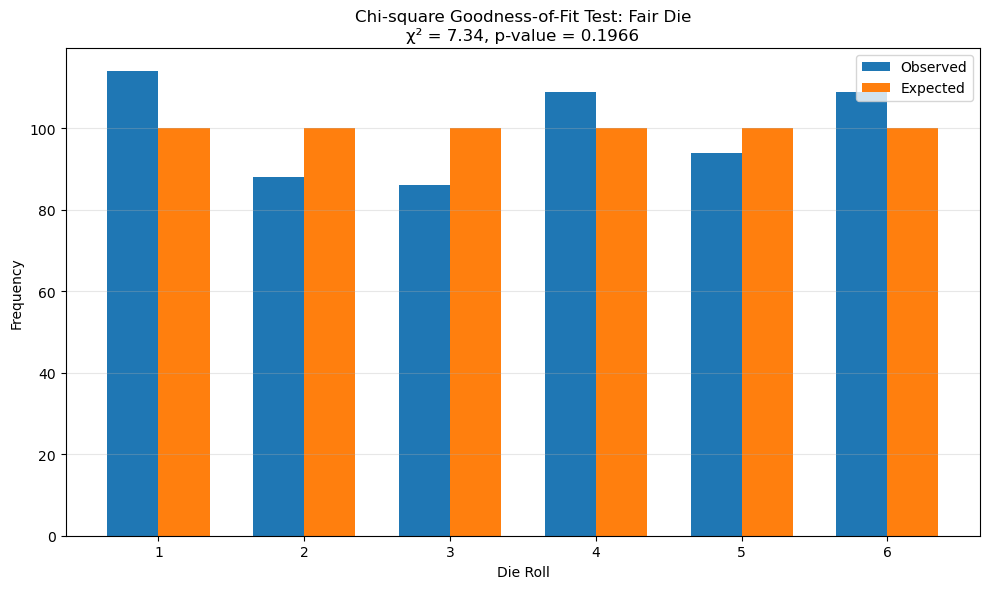

Chi-square statistic: 7.3400
p-value: 0.1966
Fail to reject the null hypothesis - The die appears fair

Example 2: Testing Mendelian inheritance in pea plants
Observed counts: Dominant=149, Recessive=51
Expected counts: Dominant=150.0, Recessive=50.0
Chi-square statistic: 0.0267
p-value: 0.8703
Fail to reject the null hypothesis - The inheritance appears to follow the expected 3:1 ratio


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from BIOM480Tests import chi2gof

# Create Figures directory if it doesn't exist
if not os.path.exists('Figures'):
    os.makedirs('Figures')

# Set random seed for reproducibility
np.random.seed(42)

# Example 1: Testing if a die is fair
print("Example 1: Testing if a die is fair")

# Expected probabilities for a fair die (6 sides)
p_expected = np.ones(6) / 6  # [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Simulate 600 rolls of a fair die
n_rolls = 600
fair_die_rolls = np.random.choice(6, size=n_rolls, p=p_expected) + 1
observed = np.bincount(fair_die_rolls)[1:7]  # Count occurrences of each value (ensure 6 elements)

# Perform chi-square goodness-of-fit test
chi2_stat, p_value = chi2gof(observed, p_vals=p_expected)

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(1, 7)
width = 0.35
plt.bar(x - width/2, observed, width, label='Observed')
plt.bar(x + width/2, n_rolls * p_expected, width, label='Expected')
plt.xlabel('Die Roll')
plt.ylabel('Frequency')
plt.title(f'Chi-square Goodness-of-Fit Test: Fair Die\nχ² = {chi2_stat:.2f}, p-value = {p_value:.4f}')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Save the figure
plt.savefig('Figures/chi2gof_example.png', dpi=300, bbox_inches='tight')
plt.show()

# Print results
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis - The die is not fair")
else:
    print("Fail to reject the null hypothesis - The die appears fair")

# Example 2: Testing Mendelian inheritance
print("\nExample 2: Testing Mendelian inheritance in pea plants")
# In genetics, Mendel's experiment with pea plants should follow a 3:1 ratio
# for dominant:recessive phenotype
p_expected_genetic = np.array([0.75, 0.25])  # 3:1 ratio

# Simulate observed data from 200 offspring
n_offspring = 200
observed_genetic = np.random.binomial(n_offspring, p_expected_genetic[0], size=1)
observed_genetic = np.array([observed_genetic[0], n_offspring - observed_genetic[0]])
expected_genetic = n_offspring * p_expected_genetic

# Perform chi-square test
chi2_stat_genetic, p_value_genetic = chi2gof(observed_genetic, expected_genetic)

print(f"Observed counts: Dominant={observed_genetic[0]}, Recessive={observed_genetic[1]}")
print(f"Expected counts: Dominant={expected_genetic[0]}, Recessive={expected_genetic[1]}")
print(f"Chi-square statistic: {chi2_stat_genetic:.4f}")
print(f"p-value: {p_value_genetic:.4f}")

if p_value_genetic < 0.05:
    print("Reject the null hypothesis - The inheritance doesn't follow the expected 3:1 ratio")
else:
    print("Fail to reject the null hypothesis - The inheritance appears to follow the expected 3:1 ratio")